# Random Forest Classifier (with Upsampling) for Subtask-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pickle

Load the dataset

In [4]:
df=pd.read_csv("D:\My_Data_Science Project\Social_Media_Offensive_Detection\Social_Media_Offensive_Languge_Detection\Data_Files\Data_File_v1\olid-training-v1.0.tsv",sep="\t")

In [5]:
df['subtask_b'].value_counts()

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

Converting target into numerical form

In [6]:
from sklearn.utils import resample
df['subtask_b'] = df['subtask_b'].astype('category').cat.codes

In [7]:
df['subtask_b'].value_counts()

-1    8840
 0    3876
 1     524
Name: subtask_b, dtype: int64

In [8]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,1,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,0,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,-1,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,1,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,-1,NaN


Now balancing the dataset

In [9]:
class_0_count = len(df[df['subtask_b']==0])
class_1_count = len(df[df['subtask_b']==1])

In [10]:
class_0_count

3876

In [11]:
class_1_count

524

Now performing upsampling for class 1

In [12]:
other_df = df[df['subtask_b']!=1]

In [13]:
other_df['subtask_b'].value_counts()

-1    8840
 0    3876
Name: subtask_b, dtype: int64

In [14]:
df_with_1 = df[df['subtask_b']==1]

In [15]:
df_with_1['subtask_b'].value_counts()

1    524
Name: subtask_b, dtype: int64

In [16]:
df_1_upsampled = resample(df_with_1, replace=True, n_samples=class_0_count, random_state=123)

In [17]:
df_1_upsampled['subtask_b'].value_counts()

1    3876
Name: subtask_b, dtype: int64

Performing concatenate

In [18]:
upsampled_df = pd.concat([df_1_upsampled, other_df])

In [19]:
upsampled_df['subtask_b'].value_counts()

-1    8840
 1    3876
 0    3876
Name: subtask_b, dtype: int64

Now after balancing performing model creation

In [20]:
count_Vect = CountVectorizer()

In [21]:
X = count_Vect.fit_transform(upsampled_df['tweet'])
Y = upsampled_df['subtask_b']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc_model = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=101,n_jobs=8)

In [25]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=8, random_state=101)

In [26]:
y_pred = rfc_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
acc_score = accuracy_score(Y_test, y_pred)
print('Accuracy score:', acc_score)

Accuracy score: 0.7824427480916031


In [29]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[2562   24   12]
 [1001  176   37]
 [   9    0 1157]]


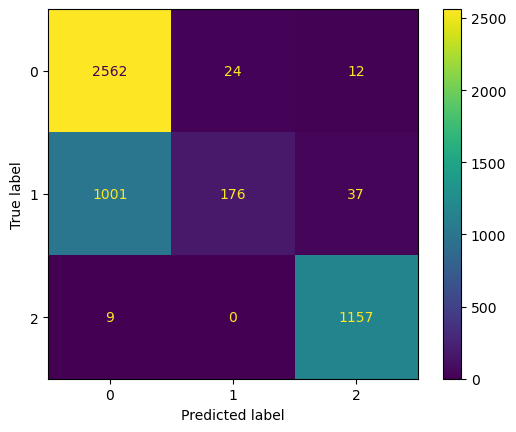

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

Now saving the model with vectorizer

In [31]:
filename = 'model_for_b.pkl'

with open(filename, 'wb') as fout:
  pickle.dump((count_Vect, rfc_model), fout)


Loading the model and vectorizer for testing

In [32]:
with open('model_for_b.pkl', 'rb') as f:
  vect, model = pickle.load(f)

In [33]:
list1 = ['StopKavanaugh he is liar like the rest of the GOP']
string = vect.transform(list1)
sample_prediction = model.predict(string)
sample_prediction

array([-1], dtype=int8)

In [34]:
import tweepy
import json

auth = tweepy.OAuth1UserHandler (consumer_key, consumer_secret, access_token, access_token_secret)

api = tweepy.API(auth)

In [35]:
search_results = api.search_tweets('PMO')
live_tweet_list = []
for tweet in search_results:
    json_str = tweet._json
    if json_str['lang'] == 'en':
      print('Tweet text: ',json_str['text'])
      live_tweet_list.append(json_str['text'])

Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  RT @iampuja29: @PiyushGoyal Sir please help students #SSC_CGL_1JAN @dopt SSC consider the change in age reckoning date of SSC CGL #PiyushJi…
Tweet text:  I need someone to pmo to some good girl talk podcasts
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…
Tweet text:  Contrary To Justin's Claims, The Trudeau Foundation &amp; Trudeau PMO Were Closely-Linked - Spencer Fernando… https://t.co/KM7OHm7YRW
Tweet text:  RT @bc_perspective: **BREAKING**

Millions of Freedom Convoy supporters across Canada denounce PSAC’s violence &amp; disruptive actions. We cal…


In [36]:
string = vect.transform(live_tweet_list)
sample_prediction = model.predict(string)
sample_prediction

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int8)